In [ ]:
# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: Mon, October 24, by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1 - Stochastic Gradient Descent (10pts)

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the $w$ parameters as a function of epoch count.

##### 1. Check attached image 

In [7]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

samples_df = pd.read_csv("samples.csv")

In [8]:
#initial coefficients are all set to zero 

def sgd_fit(X,y,alpha,i):
    for j in range(1,11):
        rand_index = random.randint(0, len(X)-1)
        chosen_x = X.ix[rand_index]
        chosen_y = y.ix[rand_index]
        w0.append(w0[j-1] + (2*alpha*(chosen_y["y"] - w0[j-1] - w1[j-1]*chosen_x["x1"] - w2[j-1]*math.pow(chosen_x["x1"],2) - w3[j-1]*chosen_x["x2"])))
        w1.append(w1[j-1] + (2*alpha*(chosen_y["y"] - w0[j-1] - w1[j-1]*chosen_x["x1"] - w2[j-1]*math.pow(chosen_x["x1"],2) - w3[j-1]*chosen_x["x2"])) * chosen_x["x1"])
        w2.append(w2[j-1] + (2*alpha*(chosen_y["y"] - w0[j-1] - w1[j-1]*chosen_x["x1"] - w2[j-1]*math.pow(chosen_x["x1"],2) - w3[j-1]*chosen_x["x2"])) * math.pow(chosen_x["x1"],2))
        w3.append(w3[j-1] + (2*alpha*(chosen_y["y"] - w0[j-1] - w1[j-1]*chosen_x["x1"] - w2[j-1]*math.pow(chosen_x["x1"],2) - w3[j-1]*chosen_x["x2"])) * chosen_x["x2"])
    return w0,w1,w2,w3
       
def predict_fn(X,w0,w1,w2,w3,j):
    predictions = []
    for i in range(len(X)):
        predictions.append(w0[j] + w1[j]*X["x1"].ix[i] + w2[j]*math.pow(X["x1"].ix[i],2) + w3[j]*X["x2"].ix[i])
    return predictions

def mse(y,predictions):
    actual = np.array(y["y"])
    mean_sq = np.mean(np.square((predictions - actual)))
    return mean_sq


In [9]:
#global
mse_array = []
w0 = []
w1 = []
w2 = []
w3 = []


ite = 10
alphas = [0.0001,0.001,0.01]


for i in range(0,3):
    mse_array.append([])
    w0.append([])
    w1.append([])
    w2.append([])
    w3.append([])
    for jtr in range(0,10):
#local
        w_0 = []
        w_1 = []
        w_2 = []
        w_3 = []

        w_0.append(0)
        w_1.append(0)
        w_2.append(0)
        w_3.append(0)

        samples_df = samples_df.sample(frac=1).reset_index(drop=True)

        X = samples_df[["x1","x2"]]
        y = samples_df[["y"]]
        alpha = alphas[i]
        for j in range(1,11):
            rand_index = random.randint(0, len(X)-1)
            chosen_x = X.ix[rand_index]
            chosen_y = y.ix[rand_index]
            w_0.append(w_0[j-1] + (2*alpha*(chosen_y["y"] - w_0[j-1] - w_1[j-1]*chosen_x["x1"] - w_2[j-1]*math.pow(chosen_x["x1"],2) - w_3[j-1]*chosen_x["x2"])))
            w_1.append(w_1[j-1] + (2*alpha*(chosen_y["y"] - w_0[j-1] - w_1[j-1]*chosen_x["x1"] - w_2[j-1]*math.pow(chosen_x["x1"],2) - w_3[j-1]*chosen_x["x2"])) * chosen_x["x1"])
            w_2.append(w_2[j-1] + (2*alpha*(chosen_y["y"] - w_0[j-1] - w_1[j-1]*chosen_x["x1"] - w_2[j-1]*math.pow(chosen_x["x1"],2) - w_3[j-1]*chosen_x["x2"])) * math.pow(chosen_x["x1"],2))
            w_3.append(w_3[j-1] + (2*alpha*(chosen_y["y"] - w_0[j-1] - w_1[j-1]*chosen_x["x1"] - w_2[j-1]*math.pow(chosen_x["x1"],2) - w_3[j-1]*chosen_x["x2"])) * chosen_x["x2"])

        w0[i].append(w_0[j])
        w1[i].append(w_1[j])
        w2[i].append(w_2[j])
        w3[i].append(w_3[j])
        predictions = predict_fn(X,w_0,w_1,w_2,w_3,ite)
        mse_1 = mse(y,predictions)
        mse_array[i].append(mse_1)



##### we created different graphs for different alpha values because the y axis scale was different

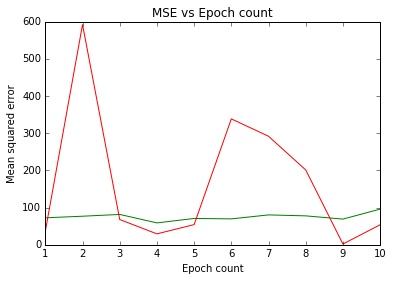

In [108]:
x = [i for i in range(1,11)]
plt.plot(x,mse_array[0],'g-',label = "alpha = 0.0001")
plt.plot(x,mse_array[1],'r-',label = "alpha = 0.001")
plt.xlabel("Epoch count")
plt.ylabel("Mean squared error")
plt.title("MSE vs Epoch count")

plt.show()

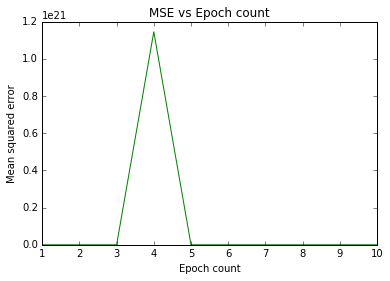

In [109]:
plt.plot(x,mse_array[2],'g-', label = "alpha = 0.01")
plt.xlabel("Epoch count")
plt.ylabel("Mean squared error")
plt.title("MSE vs Epoch count")

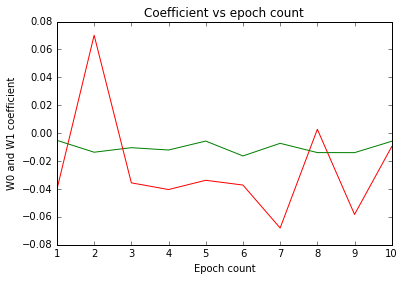

In [111]:
plt.plot(x,w0[0],'g-')
plt.plot(x,w0[1],'r')
plt.xlabel("Epoch count")
plt.ylabel("W0 coefficient")
plt.title("W0 Coefficient vs epoch count for alpha = 0.0001 and alpha = 0.001")

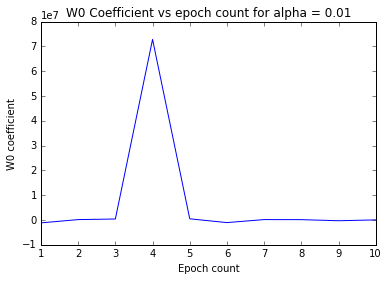

In [112]:
plt.plot(x,w0[2],'b')
plt.xlabel("Epoch count")
plt.ylabel("W0 coefficient")
plt.title("W0 Coefficient vs epoch count for alpha = 0.01")

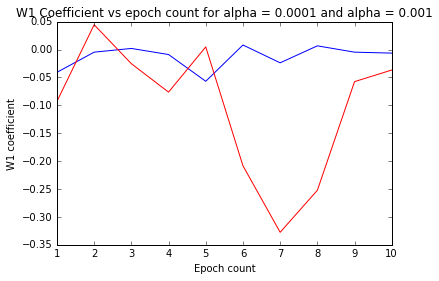

In [113]:
plt.plot(x,w1[0],'b')
plt.plot(x,w1[1],'r')
plt.xlabel("Epoch count")
plt.ylabel("W1 coefficient")
plt.title("W1 Coefficient vs epoch count for alpha = 0.0001 and alpha = 0.001")

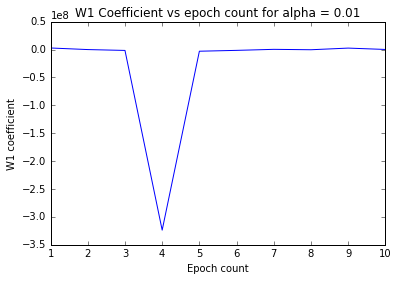

In [114]:
plt.plot(x,w1[2],'b')
plt.xlabel("Epoch count")
plt.ylabel("W1 coefficient")
plt.title("W1 Coefficient vs epoch count for alpha = 0.01")

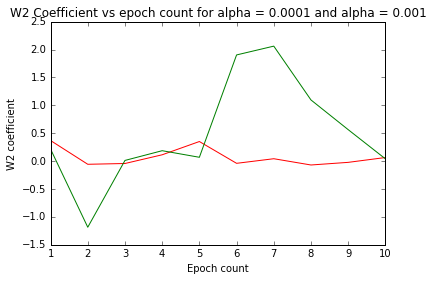

In [115]:
plt.plot(x,w2[0],'r')
plt.plot(x,w2[1],'g')
plt.xlabel("Epoch count")
plt.ylabel("W2 coefficient")
plt.title("W2 Coefficient vs epoch count for alpha = 0.0001 and alpha = 0.001")

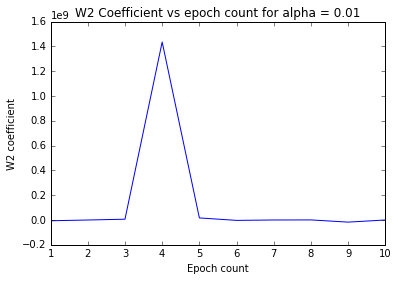

In [116]:
plt.plot(x,w2[2],'b')
plt.xlabel("Epoch count")
plt.ylabel("W2 coefficient")
plt.title("W2 Coefficient vs epoch count for alpha = 0.01")

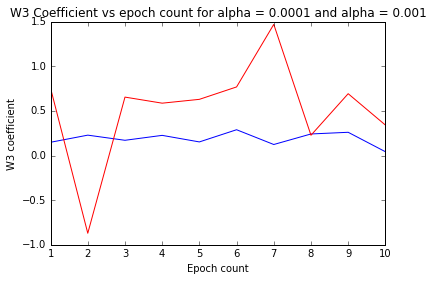

In [117]:
plt.plot(x,w3[0],'b')
plt.plot(x,w3[1],'r')
plt.xlabel("Epoch count")
plt.ylabel("W3 coefficient")
plt.title("W3 Coefficient vs epoch count for alpha = 0.0001 and alpha = 0.001")

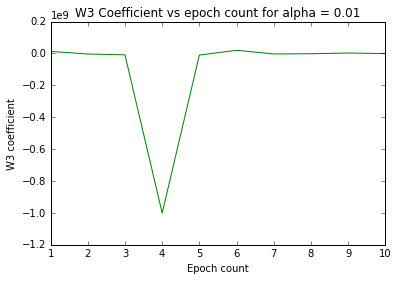

In [118]:
plt.plot(x,w3[2],'g')
plt.xlabel("Epoch count")
plt.ylabel("W3 coefficient")
plt.title("W3 Coefficient vs epoch count for alpha = 0.01")

For each graph, the third lambda parameter of 0.01, we are getting large values which required a larger scale of y values to plot.
So, we plotted them separately.

# Question 2: Gradient Descent (5 pts)

Suppose we are trying to use gradient descent to minimize a cost function y = f(w) as shown in the figure below. This function is linearly decreasing between A and B, constant between B and C, quadratic between C and D and constant between D and E. Assume that we have 10000 data points in our training set. If we choose the starting point between B and C, will we be able to find the local minima? Explain your answer. If your answer is "Yes", can you give a bound on the number of iterations required to get to the local minima?

<img src="sgd.png">

Points on the line BC seem to be a saddle points. So, no matter how many iterations, we will never reach the local minima if we start at a point that lies on this line. The derivate of the loss function is zero if we consider any point in between B and C because the slope is 0. To get out of this, we take the next derivative, i.e, the second derivative of the loss function. 

# Question 3: Multi-layer Perceptron regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test_l = train_test_split(X,y,test_size = 0.33, random_state=42)

(263, 16)


In [90]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test_l = y_test_l.reset_index(drop=True)

One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn import preprocessing
import math

In [92]:
X_scaler = StandardScaler()
X_train_s = X_scaler.fit_transform(X_train)
X_test_s = X_scaler.transform(X_test)

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (6pts)
   
   
2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (5pts)


3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each iteration. For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is iteration number and *Y-axis* is squared root of *loss\_curve\_* value. (4pts)

In [93]:
x_train = pd.DataFrame(X_train_s, index = X_train.index, columns = X_train.columns)
x_test = pd.DataFrame(X_test_s, index = X_test.index, columns = X_test.columns)

In [95]:
mlp = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=40, learning_rate_init = 0.001, hidden_layer_sizes = (2,))

In [96]:
mlp_1 = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=40, learning_rate_init = 0.001, hidden_layer_sizes = (15,))

In [97]:
kf = KFold(n_splits=5)
rmse = []
for train_index, test_index in kf.split(X_train): 
    X_train, X_test = x_train.ix[train_index], x_train.ix[test_index]
    y,y_test = y_train.ix[train_index],y_train.ix[test_index] 
    mlp.fit(X_train,y)
    y_pred = mlp.predict(X_test)
    rmse.append(math.sqrt(np.mean(((y_pred-y_test)**2))))

print "Two hidden layers cross validation RMSE",np.mean(rmse)

Two hidden layers cross validation RMSE 401.64554642


In [98]:
kf = KFold(n_splits=5)
rmse = []
for train_index, test_index in kf.split(X_train): 
    X_train, X_test = x_train.ix[train_index], x_train.ix[test_index]
    y,y_test = y_train.ix[train_index],y_train.ix[test_index] 
    mlp_1.fit(X_train,y)
    y_pred = mlp_1.predict(X_test)
    rmse.append(math.sqrt(np.mean((y_pred-y_test)**2)))

print "15 hidden layers RMSE",np.mean(rmse)

15 hidden layers RMSE 332.477653551


In [14]:
#Running the model on the entire data set 

In [99]:
mlp.fit(x_train,y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size=40, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [101]:
train_preds = mlp.predict(x_train)
rmse_train = math.sqrt(np.mean((train_preds-y_train)**2))
print "RMSE on entire train, 2 hidden layers", rmse_train
test_preds = mlp.predict(x_test)
rmse_test = math.sqrt(np.mean((test_preds-y_test_l)**2))
print "RMSE on entire test, 2 hidden layers", rmse_test

RMSE on entire train, 2 hidden layers 456.44978023
RMSE on entire test, 2 hidden layers 530.418046045


In [17]:
mlp_1.fit(x_train,y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size=40, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [103]:
train_preds = mlp_1.predict(x_train)
rmse_train = math.sqrt(np.mean((train_preds-y_train)**2))
print "RMSE on entire train, 15 hidden layers", rmse_train
test_preds = mlp_1.predict(x_test)
rmse_test = math.sqrt(np.mean((test_preds-y_test_l)**2))
print "RMSE on entire test, 15 hidden layers", rmse_test

RMSE on entire train, 15 hidden layers 282.799371143
RMSE on entire test, 15 hidden layers 447.807239493


##### Conclusion - 15 hidden units work better than 2 hidden units ( we use RMSE as the measurement criterion ). Increasing the number of hidden units increases the complexity of the model. This means that 15 hidden units is a more complex model than the model with 2 hidden units. It is fitting the data better because of the increased complexity, therefore resulting in a lower RMSE. 

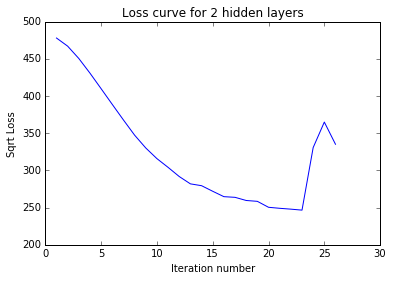

In [290]:
x = [i+1 for i in range(len(mlp.loss_curve_))]
plt.plot(x,numpy.sqrt(mlp.loss_curve_))
plt.title("Loss curve for 2 hidden layers")
plt.xlabel("Iteration number")

plt.ylabel("Sqrt Loss")

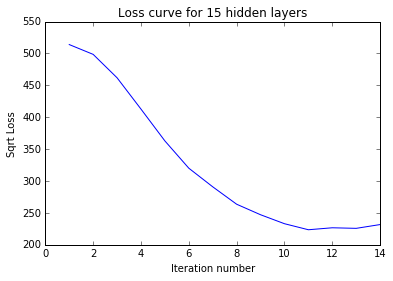

In [291]:
x = [i+1 for i in range(len(mlp_1.loss_curve_))]
plt.plot(x,numpy.sqrt(mlp_1.loss_curve_))
plt.title("Loss curve for 15 hidden layers")
plt.xlabel("Iteration number")
plt.ylabel("Sqrt Loss")

# Question 4 - Bayesian Classifiers (10 pts)

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. (3 pts)
4. Report the area under the ROC curve (AUC) for each model. (2 pts)
6. Justify the performance of each model, relative to the others. (1 pts)
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import label_binarize

1) The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.

In [20]:
data = pd.read_csv('Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])

# Splitting into train and test
train = data[200:-50] # 1000 before last 50
test = data[-50:] # Last 50

X_train = train.loc[:,'Lag1':'Lag5']
y_train = train["Direction"]

X_test = test.loc[:,'Lag1':'Lag5']
y_test = test["Direction"]

2) Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.

In [21]:
# LDA
lda = LDA(n_components=2) 
lda = lda.fit(X_train, y_train)

# Classifying test data
z_labels = lda.predict(X_test)
z_prob = lda.predict_proba(X_test)
print "The probabilities corresspond to the following classes: ",lda.classes_
print "The score of this model is: ",lda.score(X_test, y_test),"\n"

# Getting the probabilities for stock prices going up
up_prob = z_prob[:,1]

print "The probabilities for stock prices going up: ","\n",up_prob

The probabilities corresspond to the following classes:  ['Down' 'Up']
The score of this model is:  0.58 

The probabilities for stock prices going up:  
[ 0.50495139  0.53888531  0.5460308   0.48018948  0.50410137  0.54458982
  0.56017026  0.49769297  0.47978215  0.52617498  0.51029709  0.49970422
  0.52042265  0.52250458  0.53138583  0.52692331  0.50134644  0.50512077
  0.52537782  0.5383885   0.52687662  0.49813693  0.50034259  0.50838111
  0.50735945  0.51089105  0.51702718  0.54526059  0.53910151  0.53978695
  0.50315974  0.50545367  0.53294792  0.52805968  0.53540298  0.5360912
  0.51948838  0.51823581  0.51104121  0.50745048  0.52424983  0.53667396
  0.54464254  0.53392537  0.51790313  0.51039563  0.51899174  0.55028815
  0.53725289  0.52888425]


In [26]:
# QDA
qda = QDA() 
qda = qda.fit(X_train, y_train)

# Classifying test data
z_labels = qda.predict(X_test)
z_prob = qda.predict_proba(X_test)
print "The probabilities corresspond to the following classes: ",qda.classes_
print "The score of this model is: ",qda.score(X_test, y_test),"\n"

# Getting the probabilities for stock prices going up
up_prob = z_prob[:,1]

print "The probabilities for stock prices going up: ","\n",up_prob

The probabilities corresspond to the following classes:  ['Down' 'Up']
The score of this model is:  0.6 

The probabilities for stock prices going up:  
[ 0.51608319  0.60932715  0.56674716  0.49389134  0.44493699  0.42711001
  0.5947014   0.40333185  0.42242319  0.54875177  0.46850166  0.49332103
  0.54214734  0.51150513  0.55562714  0.53548244  0.50472836  0.51405257
  0.52135404  0.53976327  0.53419554  0.48647817  0.51552079  0.5307657
  0.52015037  0.52769563  0.52921863  0.56363507  0.54563351  0.57339676
  0.51352365  0.50758186  0.54396451  0.51461812  0.55687001  0.54612926
  0.52845656  0.52082606  0.53346651  0.52087628  0.53498588  0.53469518
  0.57173601  0.54304872  0.51880771  0.52398823  0.52791895  0.54691113
  0.54319708  0.53904983]


In [27]:
# Gaussian NB
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)

# Classifying test data
z_labels = gnb.predict(X_test)
z_prob = gnb.predict_proba(X_test)
print "The probabilities corresspond to the following classes: ",gnb.classes_
print "The score of this model is: ",gnb.score(X_test, y_test),"\n"

# Getting the probabilities for stock prices going up
up_prob = z_prob[:,1]

print "The probabilities for stock prices going up: ","\n",up_prob

The probabilities corresspond to the following classes:  ['Down' 'Up']
The score of this model is:  0.64 

The probabilities for stock prices going up:  
[ 0.52445941  0.55097189  0.53629457  0.4815397   0.49928432  0.52873778
  0.56875717  0.5101123   0.4827342   0.5164161   0.5122049   0.49966796
  0.52317065  0.52936119  0.53877443  0.53606028  0.5146226   0.51524427
  0.53095922  0.5473227   0.53421838  0.51199171  0.51082035  0.5145983
  0.51674487  0.51769911  0.5255285   0.55759997  0.5466252   0.54611423
  0.5184121   0.50847824  0.53333007  0.53281417  0.54133794  0.54493375
  0.5272895   0.52724473  0.52114216  0.5185724   0.5329231   0.54559092
  0.55463276  0.54156401  0.52485929  0.51978653  0.52712244  0.56410004
  0.54519065  0.53221823]


3) Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. 

4) Report the area under the ROC curve (AUC) for each model. (2 pts)

In [28]:
# LDA

# Overwriting probabilities (since same variable used in the previous cell)
z_prob = lda.predict_proba(X_test)
up_prob = z_prob[:,1]

# Binarizing y variable
y_binarized = [1 if x=="Up" else 0 for x in y_test.values.tolist()]

# Getting tpr and fpr
fpr, tpr, threshold = roc_curve(y_binarized,up_prob)

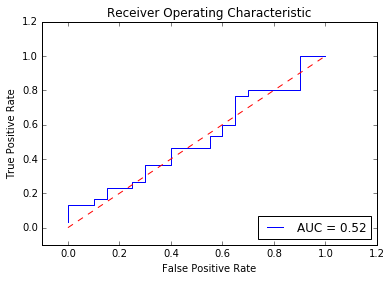


Area under the curve:  0.52


In [29]:
# Getting AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print "\n","Area under the curve: ",round(roc_auc,3)

In [30]:
# QDA

# Overwriting probabilities (since same variable used in the previous cell)
z_prob = qda.predict_proba(X_test)
up_prob = z_prob[:,1]

# Getting tpr and fpr
fpr, tpr, threshold = roc_curve(y_binarized,up_prob)

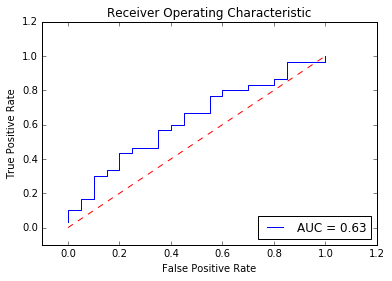


Area under the curve:  0.628


In [31]:
# Getting AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print "\n","Area under the curve: ",round(roc_auc,3)

In [32]:
# Gaussian NB

# Overwriting probabilities (since same variable used in the previous cell)
z_prob = gnb.predict_proba(X_test)
up_prob = z_prob[:,1]

# Getting tpr and fpr
fpr, tpr, threshold = roc_curve(y_binarized,up_prob)

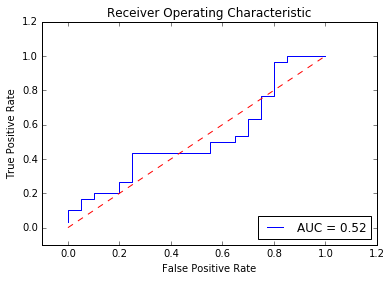


Area under the curve:  0.522


In [33]:
# Getting AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print "\n","Area under the curve: ",round(roc_auc,3)

5) Justify the performance of each model, relative to the others. (1 pts)

Based on score on the test set, Gaussian NB is the best performer followed by QDA and then LDA. Based on AUC, QDA is the best followed by Gaussian NB and LDA. The performance in QDA and Gaussian NB is better than the performance of LDA because LDA makes an assumption that the covariance of each class is identical. This assumption iss misleading because the classes are very different from each other. 

6) Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance.

In [368]:
# Splitting into train and test
train = data[1100:-50] # 1000 before last 50
test = data[-50:] # Last 50

X_train = train.loc[:,'Lag1':'Lag5']
y_train = train["Direction"]

X_test = test.loc[:,'Lag1':'Lag5']
y_test = test["Direction"]

In [370]:
# LDA
lda = LDA(n_components=2) 
lda = lda.fit(X_train, y_train)

# Classifying test data
z_labels = lda.predict(X_test)
z_prob = lda.predict_proba(X_test)
print "The probabilities corresspond to the following classes: ",lda.classes_
print "The score of this model is: ",lda.score(X_test, y_test),"\n"

# Getting the probabilities for stock prices going up
up_prob = z_prob[:,1]

print "The probabilities for stock prices going up: ","\n",up_prob

The probabilities corresspond to the following classes:  ['Down' 'Up']
The score of this model is:  0.58 

The probabilities for stock prices going up:  
[ 0.62757055  0.49831866  0.59883105  0.55399501  0.38954149  0.65483731
  0.68631219  0.51519205  0.39984874  0.53253423  0.68662779  0.53230859
  0.55094442  0.63308053  0.57592826  0.56979968  0.52786458  0.4954003
  0.59083634  0.63102514  0.57636063  0.5018231   0.4878628   0.57869586
  0.60373322  0.57433889  0.59025204  0.60780452  0.61337247  0.54028719
  0.49077751  0.48026969  0.56378593  0.64292516  0.54360339  0.5619605
  0.53839722  0.49824898  0.54282656  0.54546409  0.56707117  0.61739251
  0.59408066  0.55015708  0.50243506  0.49267772  0.54628973  0.60420893
  0.61374763  0.5120684 ]


In [371]:
# QDA
qda = QDA() 
qda = qda.fit(X_train, y_train)

# Classifying test data
z_labels = qda.predict(X_test)
z_prob = qda.predict_proba(X_test)
print "The probabilities corresspond to the following classes: ",qda.classes_
print "The score of this model is: ",qda.score(X_test, y_test),"\n"

# Getting the probabilities for stock prices going up
up_prob = z_prob[:,1]

print "The probabilities for stock prices going up: ","\n",up_prob

The probabilities corresspond to the following classes:  ['Down' 'Up']
The score of this model is:  0.56 

The probabilities for stock prices going up:  
[ 0.86027461  0.108623    0.8834481   0.99895633  0.24638835  0.40071532
  0.54364405  0.70966025  0.01308293  0.9979379   0.79459057  0.00554422
  0.91108667  0.67487825  0.23569094  0.6106356   0.56238239  0.44394555
  0.75907174  0.50123792  0.4988605   0.44182319  0.39765737  0.79452628
  0.54897175  0.3704162   0.55196489  0.37633264  0.50902086  0.73644308
  0.50354274  0.31438583  0.95600619  0.79563692  0.21261766  0.55720496
  0.6746858   0.50729052  0.51264032  0.52400244  0.66991039  0.55883954
  0.46246176  0.5942035   0.54268204  0.41078907  0.55696596  0.56862297
  0.58263847  0.67540139]


In [372]:
# Gaussian NB
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)

# Classifying test data
z_labels = gnb.predict(X_test)
z_prob = gnb.predict_proba(X_test)
print "The probabilities corresspond to the following classes: ",gnb.classes_
print "The score of this model is: ",gnb.score(X_test, y_test),"\n"

# Getting the probabilities for stock prices going up
up_prob = z_prob[:,1]

print "The probabilities for stock prices going up: ","\n",up_prob

The probabilities corresspond to the following classes:  ['Down' 'Up']
The score of this model is:  0.54 

The probabilities for stock prices going up:  
[ 0.53059659  0.25528863  0.74727241  0.75040367  0.0255253   0.7765951
  0.72778848  0.05835349  0.25669711  0.88329844  0.63114218  0.08041362
  0.65272115  0.70484208  0.41326656  0.577217    0.5751816   0.43410525
  0.73314041  0.69824768  0.46016595  0.52593561  0.41274298  0.72604015
  0.64750806  0.45546584  0.63360165  0.61277987  0.53242365  0.68013448
  0.44648415  0.27205001  0.83432643  0.63475956  0.29905857  0.58757867
  0.61845294  0.5326569   0.55614389  0.54824427  0.63436416  0.69972828
  0.57345693  0.53302478  0.60475536  0.51414994  0.52316393  0.6777204
  0.54062315  0.67346192]


In [373]:
# ROC curves
# LDA

# Overwriting probabilities (since same variable used in the previous cell)
z_prob = lda.predict_proba(X_test)
up_prob = z_prob[:,1]

# Binarizing y variable
y_binarized = [1 if x=="Up" else 0 for x in y_test.values.tolist()]

# Getting tpr and fpr
fpr, tpr, threshold = roc_curve(y_binarized,up_prob)

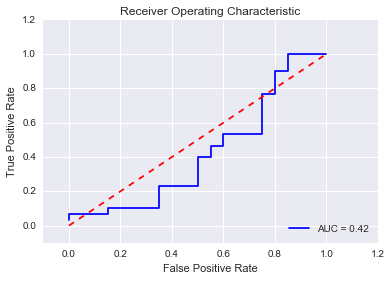


Area under the curve:  0.422


In [374]:
# Getting AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print "\n","Area under the curve: ",round(roc_auc,3)

In [375]:
# QDA

# Overwriting probabilities (since same variable used in the previous cell)
z_prob = qda.predict_proba(X_test)
up_prob = z_prob[:,1]

# Getting tpr and fpr
fpr, tpr, threshold = roc_curve(y_binarized,up_prob)

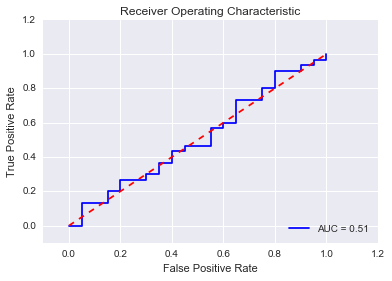


Area under the curve:  0.508


In [376]:
# Getting AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print "\n","Area under the curve: ",round(roc_auc,3)

In [377]:
# Gaussian NB

# Overwriting probabilities (since same variable used in the previous cell)
z_prob = gnb.predict_proba(X_test)
up_prob = z_prob[:,1]

# Getting tpr and fpr
fpr, tpr, threshold = roc_curve(y_binarized,up_prob)

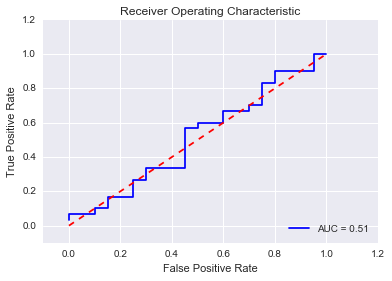


Area under the curve:  0.508


In [378]:
# Getting AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print "\n","Area under the curve: ",round(roc_auc,3)

Based on score on the test set, LDA is the best performer followed by QDA and then Gaussian NB. Based on AUC, QDA and Gaussian NB perform equally well followed by LDA. When we take a smaller subset of the data, LDA performs as well as the other classifiers because the assumption of LDA that covariances of classes are similar are much more appropriate in smaller datasets. 

# Question 5 - Logistic Regression (15pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.001, 0.01, ..., 1000]
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Following code will load and clean the dataset and load some useful functions

In [2]:
import pandas as pd
import numpy as np

from sklearn import cross_validation
# from sklearn import model_selection # Use model_selection instead of cross_validation in sklearn version >=0.18
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.grid_search import GridSearchCV

Auto = pd.read_csv('Auto.csv', na_values='?').drop('name',axis = 1).dropna()
Auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [3]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer


In [4]:
Auto['mpg01'] = (Auto.mpg > np.median(Auto.mpg)).astype(int)

x_train, x_test = train_test_split(Auto, test_size=0.33, random_state=42)
train_y = x_train["mpg01"]
test_y = x_test["mpg01"]

In [5]:
x_train = x_train.drop("mpg", axis = 1, inplace = False)
x_train = x_train.drop("mpg01", axis = 1, inplace = False)

x_test = x_test.drop("mpg", axis = 1, inplace = False)
x_test = x_test.drop("mpg01", axis = 1, inplace = False)

In [6]:
logit = linear_model.LogisticRegression(C=1000000)
logit.fit(x_train,train_y)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [7]:
predicted_class = logit.predict(x_test)
cm = pd.crosstab(predicted_class,test_y,rownames = ["Predicted_class"], colnames = ["Actual_class"])

In [8]:
cm

Actual_class,0,1
Predicted_class,,
0,55,2
1,15,58


In [9]:
accuracy = (1.0*cm[0][0] + cm[1][1])/len(test_y)
accuracy

0.86923076923076925

In [10]:
cm[0][1]

15

In [11]:
average_class_accuracy = (((1.0*cm[0][0]+cm[1][1])/len(test_y)) + ((1.0*cm[1][1]+cm[0][0])/len(test_y)))/2
average_class_accuracy

0.86923076923076925

For a binary class problem, the average per class accuracy is the same as overall average accuracy. 

In [12]:
logit_cv = linear_model.LogisticRegression()  #default l2 penalty

In [13]:
def average_accuracy(actual_class,predicted_class):
    return np.mean(actual_class == predicted_class)

score = make_scorer(average_accuracy, greater_is_better=True)

In [14]:
parameters = {'C':[0.001,0.01, 0.1, 1, 10 ,100, 1000]}
grid_search = GridSearchCV(logit_cv,parameters,scoring = score,cv=5)

In [15]:
grid_search.fit(x_train,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(average_accuracy), verbose=0)

In [16]:
grid_search.best_params_

{'C': 0.01}

In [17]:
grid_search.best_score_

0.92366412213740456

In [18]:
#repeating for l1 : 

In [19]:
logit_cv_l1 = linear_model.LogisticRegression(penalty='l1') 

In [20]:
grid_search_l1 = GridSearchCV(logit_cv_l1,parameters,scoring = score,cv=5)
grid_search_l1.fit(x_train,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(average_accuracy), verbose=0)

In [21]:
grid_search_l1.best_params_

{'C': 10}

In [22]:
grid_search_l1.best_score_

0.9274809160305344

##### Both the regularizations use the same alpha parameter and both of them give the same accuracy. This is because the number of features is very less so regularization does not have much of an effect. The effect of regularization is visible only when the features are too many. Here, we get the same average accuracy score for both L1 and L2 regularization because for low dimensions, they behave similarly

# Question 6: House Prices (kaggle competition) (25 pts)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

In [40]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import skew
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
%matplotlib inline 

In [41]:
# Loading in the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Train + test dataset for further preprocessing
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

# Taking a look at the data
display(train.describe())
train[:5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Preprocessing

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64 

The median of the Housing Price is:  163000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E72D630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000138F9550>]], dtype=object)

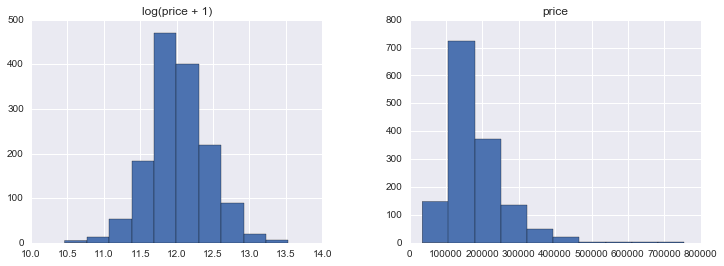

In [42]:
# Looking at the dependent variable - house prices
print train['SalePrice'].describe(),"\n"
print "The median of the Housing Price is: ", train['SalePrice'].median(axis = 0)

# Plotting the sales price (regular vs log(p+1) transformed)
matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

#### From the above graphs, we can see that the log transformed graph is more normally distributed with a lower skew.

* Variables with greater than 1000 missing values were removed as imputing them will not make sense (too little contained information)
* All the skewed predictor variables along with the target were log transformed for a more normal distribution.

In [43]:
#----  CAREFUL WHEN RUNNING THIS OVER AND OVER AS TRANSFORMATION KEEPS HAPPENING  ----

# Removing columns with >1000 missing values
for col in all_data.columns.values:
    if np.sum(all_data[col].isnull()) > 1000:
        all_data = all_data.drop(col, axis = 1)

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

# Some numerical features are actually categories
all_data = all_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

# Checking skewness in predictors (threshold = 0.5)
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.5]
skewed_feats = skewed_feats.index

#log transform skewed numeric features
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data[:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,SC60,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,4.127134,0.000000,0.0,0.0,0.0,0.0,Feb,2008,WD,Normal
1,SC20,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.000000,0.0,0.0,0.0,0.0,May,2007,WD,Normal
2,SC60,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,3.761200,0.000000,0.0,0.0,0.0,0.0,Sep,2008,WD,Normal
3,SC70,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3.583519,5.609472,0.0,0.0,0.0,0.0,Feb,2006,WD,Abnorml
4,SC60,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,4.442651,0.000000,0.0,0.0,0.0,0.0,Dec,2008,WD,Normal


* The categorical variables were dummy coded
* Train and test datasets were created and scaled to benefit regularization algorithms

In [44]:
# Creating dummy variables
all_data = pd.get_dummies(all_data)

# Imputing missing values with the median of that column
all_data = all_data.fillna(all_data.median())

# Creating matrices for model building:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

# Scaling the numeric features
stdSc = StandardScaler()
X_train.loc[:, numeric_feats] = stdSc.fit_transform(X_train.loc[:, numeric_feats])
X_test.loc[:, numeric_feats] = stdSc.transform(X_test.loc[:, numeric_feats])

X_train[:5]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.070826,-0.133270,0.651479,-0.460408,1.050994,0.878668,1.203619,0.779431,-0.355342,-0.340511,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.581263,0.113413,-0.071836,1.948163,0.156734,-0.429577,-0.806841,0.888257,-0.355342,0.002218,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.070714,0.420049,0.651479,-0.460408,0.984752,0.830215,1.131524,0.654803,-0.355342,0.230372,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.321673,0.103317,0.651479,-0.460408,-1.863632,-0.720298,-0.806841,0.384539,-0.355342,0.348034,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.734744,0.878431,1.374795,-0.460408,0.951632,0.733308,1.423411,0.754400,-0.355342,0.295711,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Model building

### *Simple linear regression*

* Simple linear regression using the most correlated variables with sales price
* This model performed better than a linear regression with all the variables as it does not suffer from the curse of dimensionality

In [6]:
# Looking at correlations to identify possible predictors for linear regression
num_feat = train.dtypes[train.dtypes != "object"].index
train_numeric = train[num_feat]
corr = abs(train_numeric.corr()['SalePrice'])
corr = corr.iloc[:-1] # removing salesprice
corr = corr[corr>.6]
print corr

OverallQual    0.817185
TotalBsmtSF    0.612134
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
Name: SalePrice, dtype: float64


In [7]:
# Creating appropriate train matrices
predictors = corr.index.tolist()

# Running it on the subsetted train dataset
model = LinearRegression()
model.fit(X_train[predictors], y)

# Getting the predictions
predictions = np.expm1(model.predict(X_test[predictors]))
df1 = pd.DataFrame({'ID': test["Id"],'Sales_linreg':predictions})
#df1_temp = df1.rename(columns={'ID': 'ID', 'Sales_linreg': 'SalePrice'})
#df1_temp.to_csv("linreg.csv", index=False)

print "The RMSE obtained on the Kaggle leaderboard was: ", 0.18421

The RMSE obtained on the Kaggle leaderboard was:  0.18421


### *Lasso regression*

* 10 fold cross validated Lasso regression (L1 penalty) was run the data
* The model performed much better than linear regression on the leaderboard. This is inline with intuition as we suspected that it would work well with a high dimensional dataset with many features that are irrelevant

In [23]:
# Running the model
lassocv = LassoCV(cv=10,normalize=True)
lassocv.fit(X_train, y)

print "Best Alpha from lasso: " + str(lassocv.alpha_), "\n"

Best Alpha from lasso: 9.81889616929e-05 



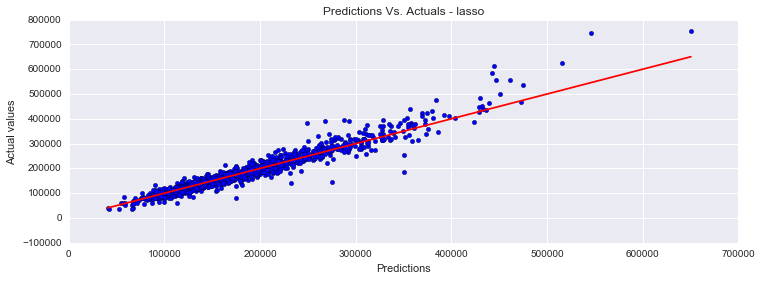

In [24]:
# Visualizing Lasso predictions on the train set
train_pred = np.expm1(lassocv.predict(X_train))
plt.scatter(train_pred, np.expm1(y))
plt.plot([min(train_pred),max(train_pred)], [min(train_pred),max(train_pred)], c="red")
plt.ylabel('Actual values')
plt.xlabel('Predictions')
plt.title('Predictions Vs. Actuals - lasso')

In [27]:
# Lasso predictions on test
predictions = np.expm1(lassocv.predict(X_test))
df1["Sales_lasso"] = predictions

#df1_temp = df1[["ID","Sales_lasso"]]
#df1_temp = df1_temp.rename(columns={'ID': 'ID', 'Sales_lasso': 'SalePrice'})
#df1_temp.to_csv("lasso.csv", index=False)

print "The RMSE obtained on the Kaggle leaderboard was: ", 0.12195

The RMSE obtained on the Kaggle leaderboard was:  0.12195


Lasso picked 111 features and eliminated the other 185 features


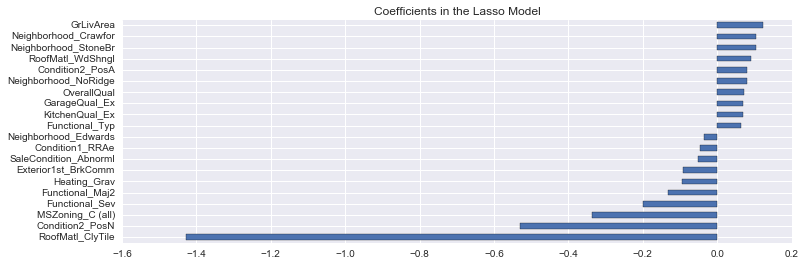

In [26]:
# Plot important coefficients
coefs = pd.Series(lassocv.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

Lasso used less than half of the available predictors and gave big weights to Neighborhood categories. Intuitively it makes sense, house prices change a whole lot from one neighborhood to another in the same city. RoofMatl_ClyTile seems to have a large negative impact.

### *Ridge regression*

* 10 fold cross validated ridge regression (L2 penalty) was run the data
* The model performed really well and gave the best RMSE out of all the models tried

In [31]:
# Running the model
ridgecv = RidgeCV(cv=10,normalize=True)
ridgecv.fit(X_train, y)

print "Best Alpha from ridge: " + str(ridgecv.alpha_), "\n"

Best Alpha from ridge: 10.0 



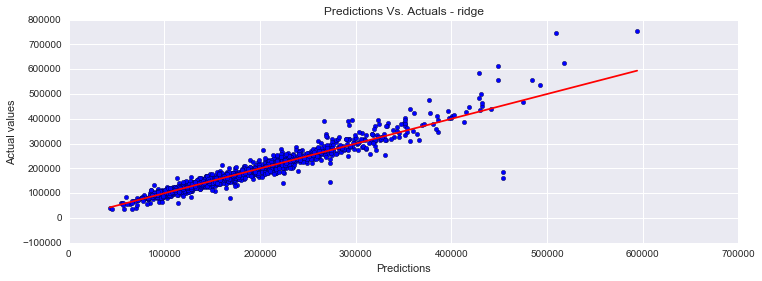

In [29]:
# Visualizing ridge predictions on the train set
train_pred = np.expm1(ridgecv.predict(X_train))
plt.scatter(train_pred, np.expm1(y))
plt.plot([min(train_pred),max(train_pred)], [min(train_pred),max(train_pred)], c="red")
plt.ylabel('Actual values')
plt.xlabel('Predictions')
plt.title('Predictions Vs. Actuals - ridge')

In [30]:
# Ridge predictions on test
predictions = np.expm1(ridgecv.predict(X_test))
df1["Sales_ridge"] = predictions

df1_temp = df1[["ID","Sales_ridge"]]
df1_temp = df1_temp.rename(columns={'ID': 'ID', 'Sales_ridge': 'SalePrice'})
df1_temp.to_csv("3_ridge.csv", index=False)

print "The RMSE obtained on the Kaggle leaderboard was: ", 0.11851

The RMSE obtained on the Kaggle leaderboard was:  0.11851


Ridge picked 295 features and eliminated the other 1 feature


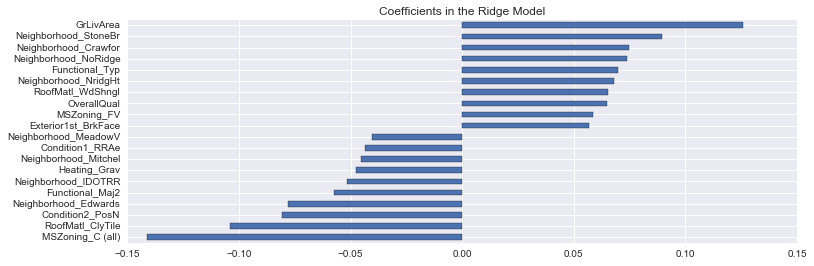

In [15]:
# Plot important coefficients
coefs = pd.Series(ridgecv.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " feature")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

### *Elastic net*

* Elastic net has a L1 penalty to generate sparsity and a L2 penalty to overcome some of the limitations of Lasso
* The model performed almost as well as the ridge

In [16]:
# Running the model
elasticnetcv = ElasticNetCV(cv=10,l1_ratio=[.1, .5, .7, .9, .95, .99, 1]) # checking for best l1_ratio
elasticnetcv.fit(X_train, y)

print "Best Alpha for elastic net: " + str(elasticnetcv.alpha_), "\n"

Best Alpha for elastic net: 0.000535970708337 



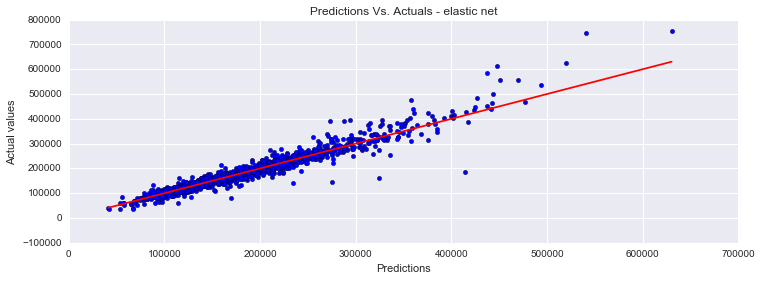

In [17]:
# Visualizing elastic net predictions on the train set
train_pred = np.expm1(elasticnetcv.predict(X_train))
plt.scatter(train_pred, np.expm1(y))
plt.plot([min(train_pred),max(train_pred)], [min(train_pred),max(train_pred)], c="red")
plt.ylabel('Actual values')
plt.xlabel('Predictions')
plt.title('Predictions Vs. Actuals - elastic net')

In [18]:
# Elastic net predictions on test
predictions = np.expm1(elasticnetcv.predict(X_test))
df1["Sales_elasticnet"] = predictions

#df1_temp = df1[["ID","Sales_elasticnet"]]
#df1_temp = df1_temp.rename(columns={'ID': 'ID', 'Sales_elasticnet': 'SalePrice'})
#df1_temp.to_csv("4_elasticnet.csv", index=False)

print "The RMSE obtained on the Kaggle leaderboard was: ", 0.11857

The RMSE obtained on the Kaggle leaderboard was:  0.11857


ElasticNet picked 131 features and eliminated the other 165 features


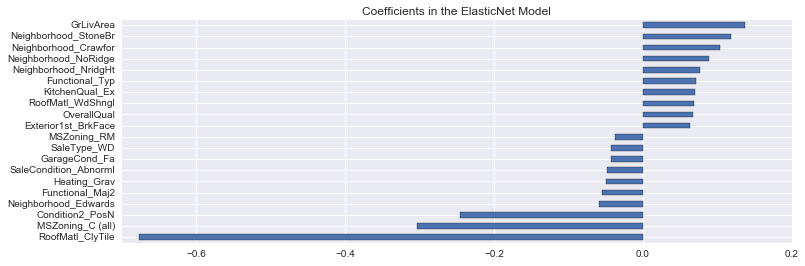

In [19]:
# Plot important coefficients
coefs = pd.Series(elasticnetcv.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

### *Multi layered perceptron*

* MLP using grid search CV to optimize parameters
* This model did not perform as well as the regularization methods. This might be because they solve problems stocahastically to get approximate solutions for extremely complex problems which is not the case here

In [32]:
# Setting up the model
parameters = {'solver':('lbfgs','sgd','adam'),'activation':('logistic','tanh'),'alpha':[0.1,0.01,0.001,0.0001]}
mlp_regressor = MLPRegressor(hidden_layer_sizes=(592,),max_iter=500)

In [33]:
# Optimizing parameters
grid_search_model = GridSearchCV(mlp_regressor,parameters)

In [34]:
grid_search_model.fit(X_train,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(592,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001], 'activation': ('logistic', 'tanh'), 'solver': ('lbfgs', 'sgd', 'adam')},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [35]:
# Printing out the optimal parameters
grid_search_model.best_params_

{'activation': 'logistic', 'alpha': 0.1, 'solver': 'lbfgs'}

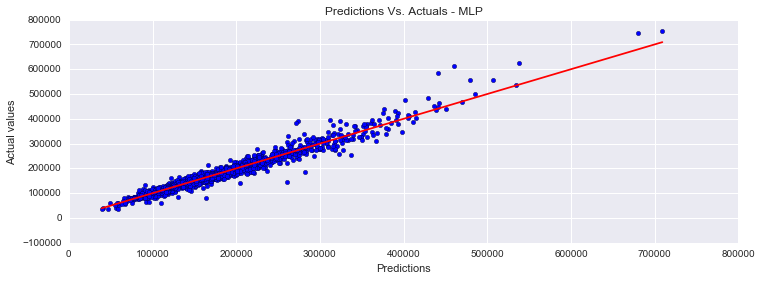

In [36]:
# Visualizing MLP predictions on the train set
train_pred = np.expm1(grid_search_model.predict(X_train))
plt.scatter(train_pred, np.expm1(y))
plt.plot([min(train_pred),max(train_pred)], [min(train_pred),max(train_pred)], c="red")
plt.ylabel('Actual values')
plt.xlabel('Predictions')
plt.title('Predictions Vs. Actuals - MLP')

In [37]:
# MLP predictions on test
predictions = np.expm1(grid_search_model.predict(X_test))
df1["Sales_MLP"] = predictions

#df1_temp = df1[["ID","Sales_MLP"]]
#df1_temp = df1_temp.rename(columns={'ID': 'ID', 'Sales_MLP': 'SalePrice'})
#df1_temp.to_csv("4_MLP.csv", index=False)

print "The RMSE obtained on the Kaggle leaderboard was: ", 0.12686

The RMSE obtained on the Kaggle leaderboard was:  0.12686


In [38]:
# Taking a look at the final dataframe with predictions
display(df1[:10])

,ID,Sales_linreg,Sales_lasso,Sales_ridge,Sales_elasticnet,Sales_MLP
0,1461,118716.376135,122678.651851,117134.243623,118697.206015,120778.002901
1,1462,148296.898983,153927.278193,156510.356401,153943.047578,159215.831194
2,1463,155725.018466,180904.794264,179751.262199,179106.896237,189202.363232
3,1464,175597.049827,195501.218923,196282.712602,196513.449156,203660.290128
4,1465,211900.166923,203905.742564,197969.068575,201571.371075,193992.686029
5,1466,175606.406106,170730.399138,168243.302545,169410.877996,173133.324195
6,1467,156636.208032,179629.748933,175809.324210,176856.829369,179959.098192
7,1468,166563.697576,160898.443340,160725.101760,160785.515813,157753.917005
8,1469,189858.320464,200424.533578,192712.809021,195581.190450,199199.693889
9,1470,109160.894548,117362.162943,120305.152661,118482.702578,122512.322108


We also tried combinations of different models to see if we could improve our score but to little success. Ridge regression was the best performing model giving an RMSE of 0.11851

Team name: ArjunVarma

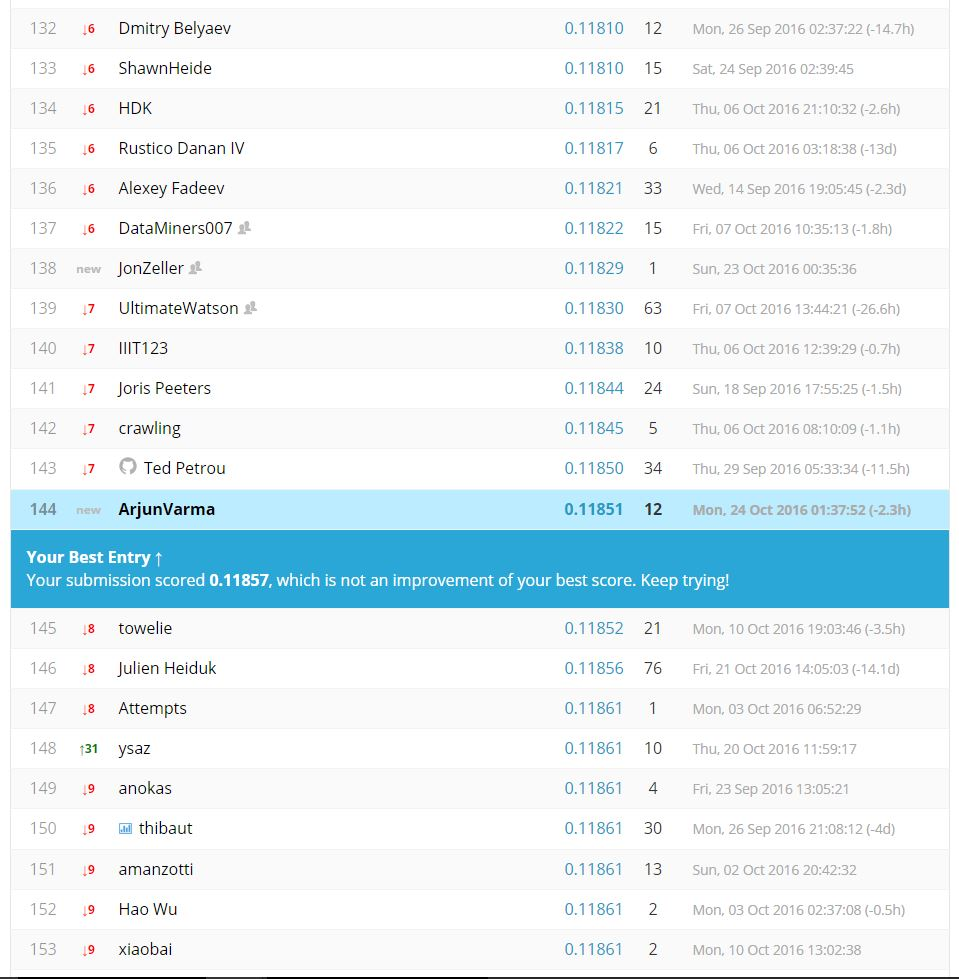

In [39]:
from IPython.display import Image
Image(filename='Leaderboard.jpg')